<a href="https://colab.research.google.com/github/catastrophist/test/blob/main/az.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd "drive"

/content/drive


In [ ]:
!ls

MyDrive


In [ ]:
%cd "MyDrive"

/content/drive/MyDrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time

In [ ]:
def creat_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)
dataframe = pd.read_csv('usedat1.csv',
                        header=0, parse_dates=[0],
                        index_col=0, usecols=[0, 1], squeeze=True)
dataset = dataframe.values
dataframe.head(10)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

look_back = 15
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)



In [ ]:
model = Sequential()

model.add(LSTM(input_dim=1, units=50, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=50, units=100, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=100, units=200, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(units=1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, None, 50)          10400     
                                                                 
 lstm_25 (LSTM)              (None, None, 100)         60400     
                                                                 
 lstm_26 (LSTM)              (None, None, 200)         240800    
                                                                 
 lstm_27 (LSTM)              (None, 300)               601200    
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
# history = model.fit(trainX[1000:1700,], trainY[1000:1700], batch_size=50, epochs=10, 
#                     validation_split=0.1, verbose=2)
# print('compilatiom time:', time.time()-start)

history = model.fit(trainX, trainY, batch_size=1000, epochs=20, 
                    validation_split=0.2, verbose=2)
print('compilatiom time:', time.time()-start)

Epoch 1/20
2/2 - 3s - loss: 4.7478e-04 - accuracy: 8.6580e-04 - val_loss: 0.0019 - val_accuracy: 0.0035 - 3s/epoch - 2s/step
Epoch 2/20
2/2 - 3s - loss: 4.1528e-04 - accuracy: 8.6580e-04 - val_loss: 0.0012 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 3/20
2/2 - 3s - loss: 3.8329e-04 - accuracy: 8.6580e-04 - val_loss: 0.0014 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 4/20
2/2 - 3s - loss: 3.8193e-04 - accuracy: 8.6580e-04 - val_loss: 0.0012 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 5/20
2/2 - 3s - loss: 4.0000e-04 - accuracy: 8.6580e-04 - val_loss: 0.0012 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 6/20
2/2 - 3s - loss: 3.8018e-04 - accuracy: 8.6580e-04 - val_loss: 0.0012 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 7/20
2/2 - 3s - loss: 3.5851e-04 - accuracy: 8.6580e-04 - val_loss: 0.0012 - val_accuracy: 0.0035 - 3s/epoch - 1s/step
Epoch 8/20
2/2 - 3s - loss: 3.7154e-04 - accuracy: 8.6580e-04 - val_loss: 0.0017 - val_accuracy: 0.0035 - 3s/epoch - 1s/step


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict

trainPredict_use = scaler.inverse_transform(trainPredict)
trainY_use = scaler.inverse_transform(trainY)
testPredict_use = scaler.inverse_transform(testPredict)
testY_use = scaler.inverse_transform(testY)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict_use)+look_back, :] = trainPredict_use

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[len(trainPredict_use)+(look_back*2)+1: len(dataset)-1, :] = testPredict_use

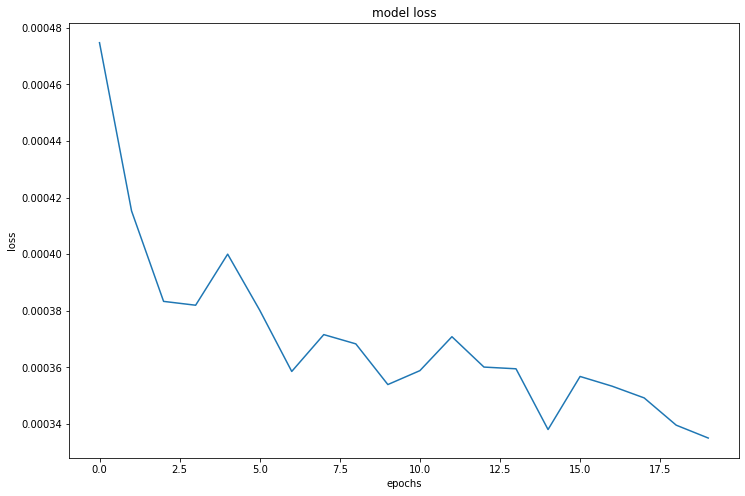

In [ ]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()




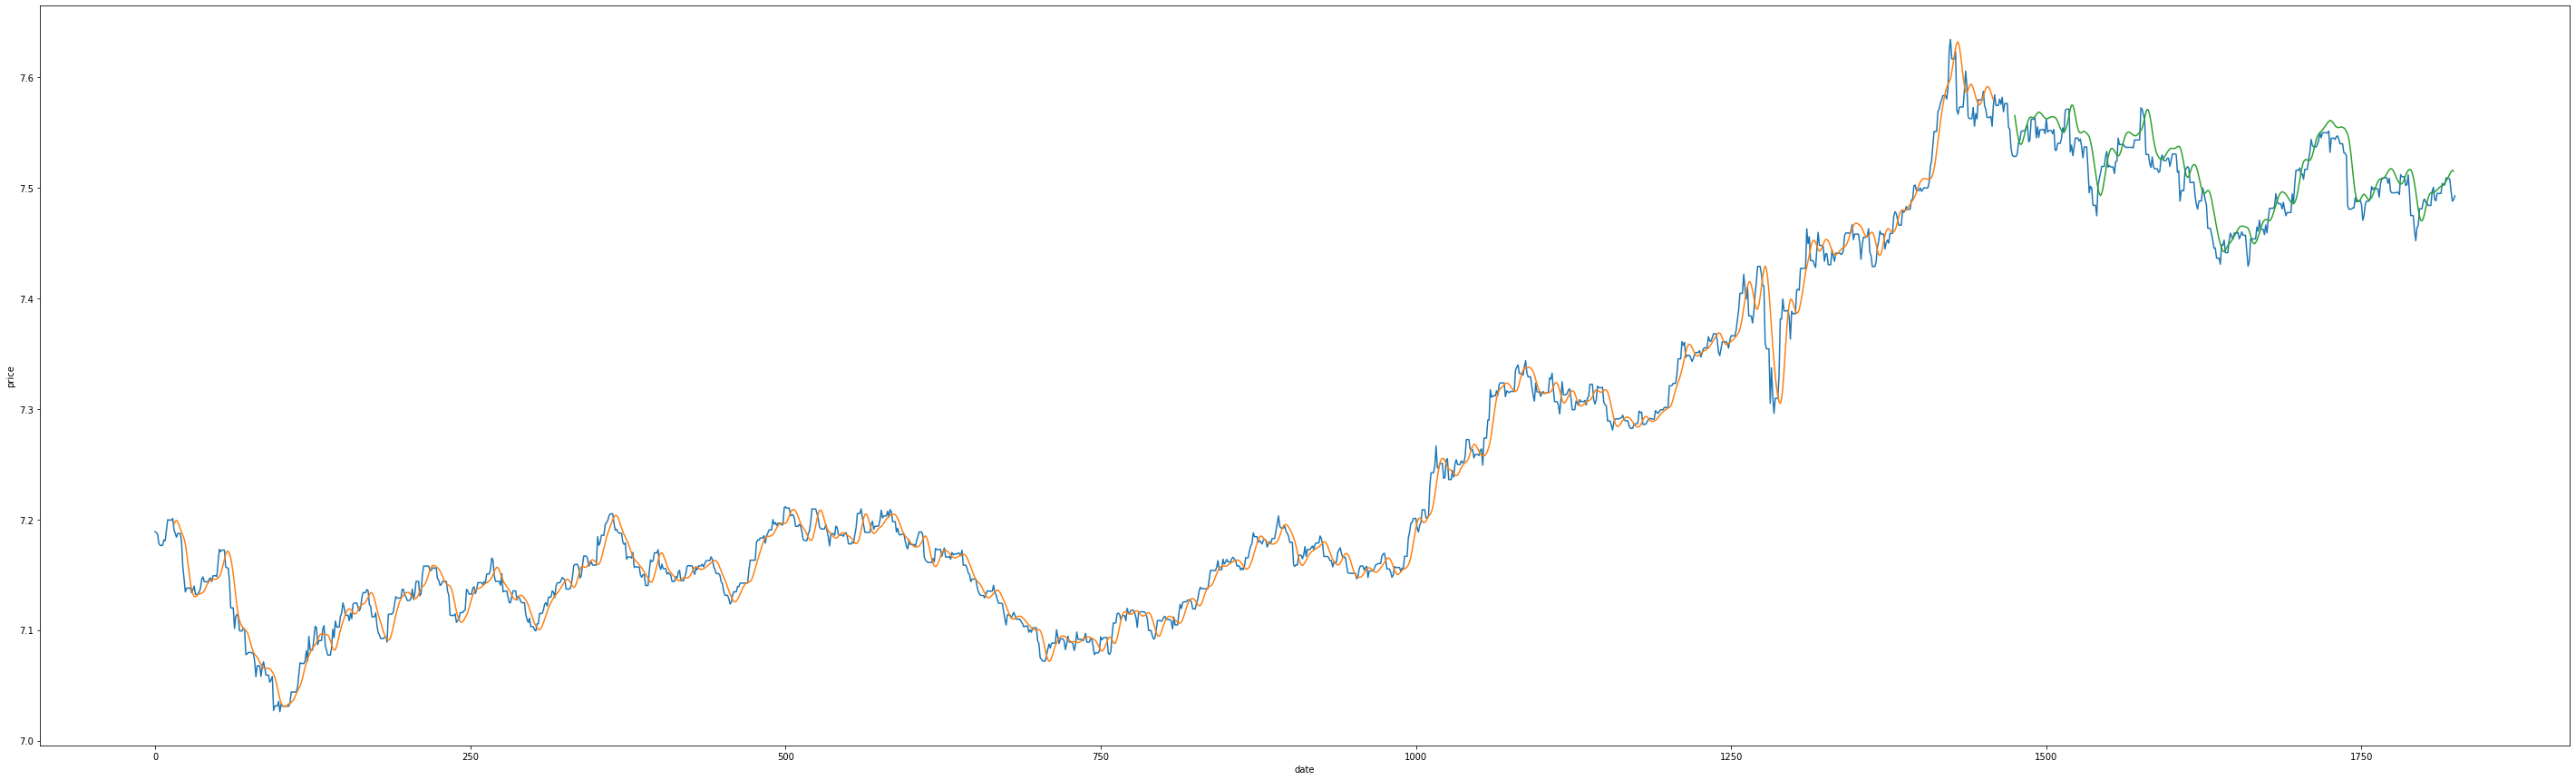

In [ ]:
fig2 = plt.figure(figsize=(50, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('price')
plt.xlabel('date')
plt.show()


In [ ]:
def creat_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)
dataframe = pd.read_csv('usedat1.csv',
                        header=0, parse_dates=[0],
                        index_col=0, usecols=[0, 1], squeeze=True)
dataset = dataframe.values
dataframe.head(10)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

train_size_allin = int(len(dataset))
test_size_allout = len(dataset)-train_size_allin
train, test = dataset[0: train_size_allin], dataset[train_size_allin: len(dataset)]

look_back = 15
trainX_allin, trainY_allout = creat_dataset(train, look_back)
testX_allin, testY_allout = creat_dataset(test, look_back)



In [ ]:
trainPredict_all = model.predict(trainX_allin)

In [ ]:
trainPredict_all = scaler.inverse_transform(trainPredict_all)

In [ ]:
pd.DataFrame(np.squeeze(trainPredict_all)).to_csv('trainPredict_all_use_gold.csv')